# Python正则表达式详解

Python 的 re 模块是一个强大的工具，用于在字符串中执行模式匹配和替换操作。它提供了一种机制，可以根据正则表达式模式来查找、匹配和处理文本。

In [ ]:
# re.match()
# match() 函数从字符串的起始位置匹配一个模式，如果匹配成功，则返回一个匹配对象，否则返回 None。

import re
 
string = "Hello, World!"
match = re.match(r"Hello", string)
 
if match:
    print("Matched")
else:
    print("Not Matched")

In [ ]:
# re.search()

# search() 函数会在字符串中查找匹配正则表达式的第一个位置，返回一个匹配对象。如果没有找到匹配，则返回 None。

import re
 
string = "Hello, World!"
match = re.search(r"World", string)
 
if match:
    print("Matched")
else:
    print("Not Matched")

In [ ]:
# re.findall()

# findall() 函数扫描整个字符串并返回所有匹配模式的列表。

import re
 
string = "Hello, World! World is beautiful."
matches = re.findall(r"World", string)
 
print(matches)  # ['World', 'World']

In [69]:
# re.split()

# split() 函数将字符串通过正则表达式进行分割，返回一个分割后的列表。

import re
 
string = "Hello, World! World is beautiful."
matches = re.split(r"\s", string)
 
print(matches)  # ['Hello,', 'World!', 'World', 'is', 'beautiful.']

['Hello,', 'World!', 'World', 'is', 'beautiful.']


In [71]:
# re.compile()

# compile() 函数用于编译正则表达式，生成一个正则表达式对象，可以用这个对象调用 findall()、match()、search() 等方法。

import re
 
pattern = re.compile(r"\d+")
match = pattern.findall("Hello123, World! World is456 beautiful.")
 
print(match)  # ['123', '456']


['123', '456']


In [1]:
from re import match, search

if __name__ == '__main__':
    pattern = "hello"
    str1 = "hell1word hello"
    # result = match(pattern, str1)
    result = search(pattern, str1)
    print(type(result))
    print(result)
    # print(result.span())  # 返回查找到字符串的索引
    # print(result.group())  # 返回查找到字符串的列表

<class 're.Match'>
<re.Match object; span=(10, 15), match='hello'>


## match 基本使用

## 表示字符

### 点匹配任意字符，但不包含\n

In [17]:
import re

# 不能匹配\n
v = re.match('.','\n')
print(v)

<re.Match object; span=(0, 1), match='\t'>
None


In [20]:
import re

v = re.match('.','\t')    # 可以匹配制表符
print(v)

v = re.match('.','a')
print(v)
v = re.match('.','1')
print(v)
v = re.match('.','_')
print(v)

<re.Match object; span=(0, 1), match='\t'>
<re.Match object; span=(0, 1), match='a'>
<re.Match object; span=(0, 1), match='1'>
<re.Match object; span=(0, 1), match='_'>


### \d数字0-9

In [19]:
v = re.match('\d','1')
print(v)

<re.Match object; span=(0, 1), match='1'>


### \D非数字

In [26]:
v = re.match('\D','a1')
print(v)

v = re.match('\D\d','a1')
print(v.group())   #如果需要提取a1,则需要用group()

<re.Match object; span=(0, 1), match='a'>
a1


### \s匹配空格

\s 匹配空格，即\n，\t(制表符)

In [14]:
v = re.match('\s',' ')
print(v)
v = re.match('\s','\n')
print(v)
v = re.match('\s','\t')
print(v)


<re.Match object; span=(0, 1), match=' '>
<re.Match object; span=(0, 1), match='\n'>
<re.Match object; span=(0, 1), match='\t'>


### \S 匹配非空格

In [8]:
v = re.match('\S',' ')
print(v)

None


### \w匹配单词字符,包含a-z,A-Z,0-9，下划线

In [10]:
v = re.match('\w','a')
print(v)
v = re.match('\w','A')
print(v)
v = re.match('\w','1')
print(v)
v = re.match('\w','_')
print(v)

<re.Match object; span=(0, 1), match='a'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='1'>
<re.Match object; span=(0, 1), match='_'>


### \W匹配单词字符,匹配非单词字符

In [11]:
v = re.match('\W','a')
print(v)
v = re.match('\W','A')
print(v)
v = re.match('\W','1')
print(v)
v = re.match('\W','_')
print(v)

None
None
None
None


In [29]:
v = re.match('\w\w','1a')
print(v)

<re.Match object; span=(0, 2), match='1a'>


## 数量的表示

- *匹配前0个或多个（可有可无）
- +匹配前1个或多个
- ？匹配前1个（可有(有只出现一次)可无）
- {n}匹配前字符出现 n 次
- {n,}匹配前字符至少出现 n 次
- {n,m}匹配前字符出现 m 次到 n 次，限定字符的位数

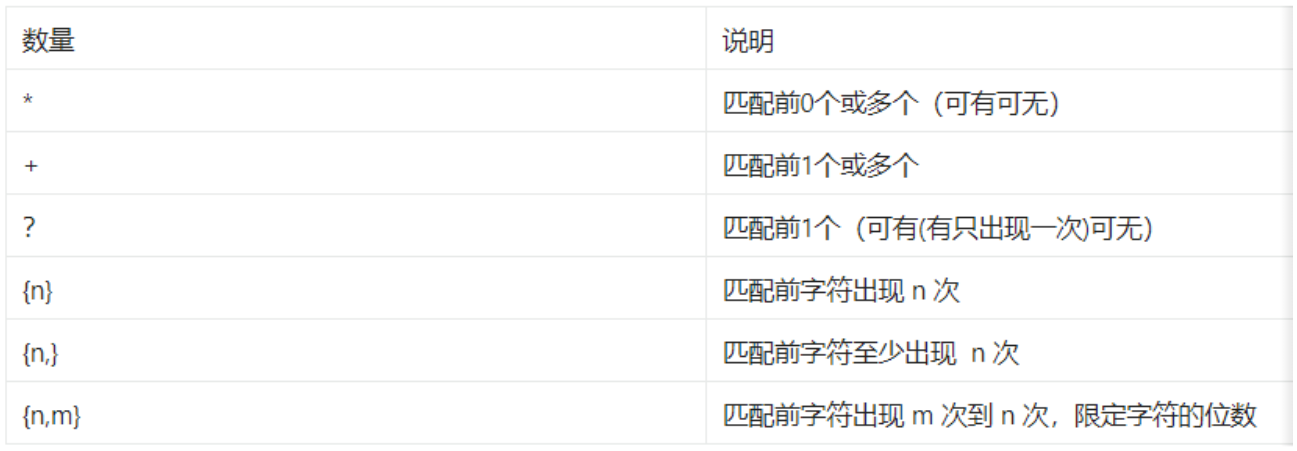


In [ ]:
### 星号，加好，问号

In [34]:
# *匹配前0个或多个（可有可无）

import re

pattern = "\d*"
s = "123123ab"
v = re.match(pattern, s)
print(v)

<re.Match object; span=(0, 6), match='123123'>


In [37]:
# +匹配前1个或多个,最少1个

import re

pattern = "\w+"
s = "123123ab"
v = re.match(pattern, s)
print(v)


pattern = "\d+"
s = "123123ab"
v = re.match(pattern, s)
print(v)


<re.Match object; span=(0, 8), match='123123ab'>
<re.Match object; span=(0, 6), match='123123'>


In [55]:
# ?匹配前面的字符零次或一次 ，

import re

# 匹配数字 1-99
pattern = "pytho?n"
s = "python"
v = re.match(pattern, s)
print(v)

s = "pythn"
v = re.match(pattern, s)
print(v)

# 可以匹配为python或pythn

<re.Match object; span=(0, 6), match='python'>
<re.Match object; span=(0, 5), match='pythn'>


### 范围{n,m}

In [32]:
import re

pattern = "\d{2,4}"
s = "123123ab"
v = re.match(pattern, s)
print(v)

<re.Match object; span=(0, 4), match='1231'>


In [50]:
# 匹配手机号
pattern = "1[348]\d{9}"
s = "18345678901"
print(re.match(pattern, s))


<re.Match object; span=(0, 11), match='18345678901'>


In [52]:
# 用户名由字母、数字、下划线组成，位数 5,10位之间
pattern = "[a-zA-Z_]{5,10}"
s = "_abcaa1111"
print(re.match(pattern, s))

<re.Match object; span=(0, 6), match='_abcaa'>


## 边界

In [ ]:
^匹配字符串开头
$匹配字符串结尾
\b匹配一个单词的边界
\B匹配非单词的边界

In [58]:
import re


pattern = r"\w*er\b"
pattern = r"\bHello_\w*"
pattern = r"\bhttp://www.\w*.com"
s = "zwzwer"
s = "Hello_1232ljj"
s = "https://www.baidu.com"

In [65]:
# 以$匹配字符串结尾

import re

# 匹配 163 邮箱
pattern = "1[389]\d{9}@163.com$"
s = "13856123451@163.com"
print(re.match(pattern, s))

<re.Match object; span=(0, 19), match='13856123451@163.com'>


## 分组

- |匹配左右任意一个表达式
- (ab)将括号中的字符作为一个分组
- \num引用分组num 匹配到的字符串
- (?p<name>)分别起组名
- (?p=name)引用别名为name分组匹配到的字符串

In [80]:
pattern = r"[1,9]?\d$|100$"  # 注意： | 前后不能有空格，否则当做匹配的规则
s = "0"
# s = "99"
# s = "100"
v = re.match(pattern, s)
print(v)

<re.Match object; span=(0, 1), match='0'>


In [ ]:
import re

list = [0,15,66,101,3,254]
pattern = re.compile(r'[1-9][0-9]?$|100$')
result = [int(x) for x in map(str, list) if pattern.match(x)]
print(result)

In [ ]:
# 正则表达式'[1-9][0-9]?$|100$'含义：‌
# [1-9][0-9]?$：‌匹配1-99的数字。‌
# [1-9]：‌首位为1-9。‌
# [0-9]?：‌第二位可为0-9，‌?表示第二位数字可有可无。‌
# $：‌确保数字结尾，‌防止匹配数字前缀。‌
# |100$：‌或匹配数字100。